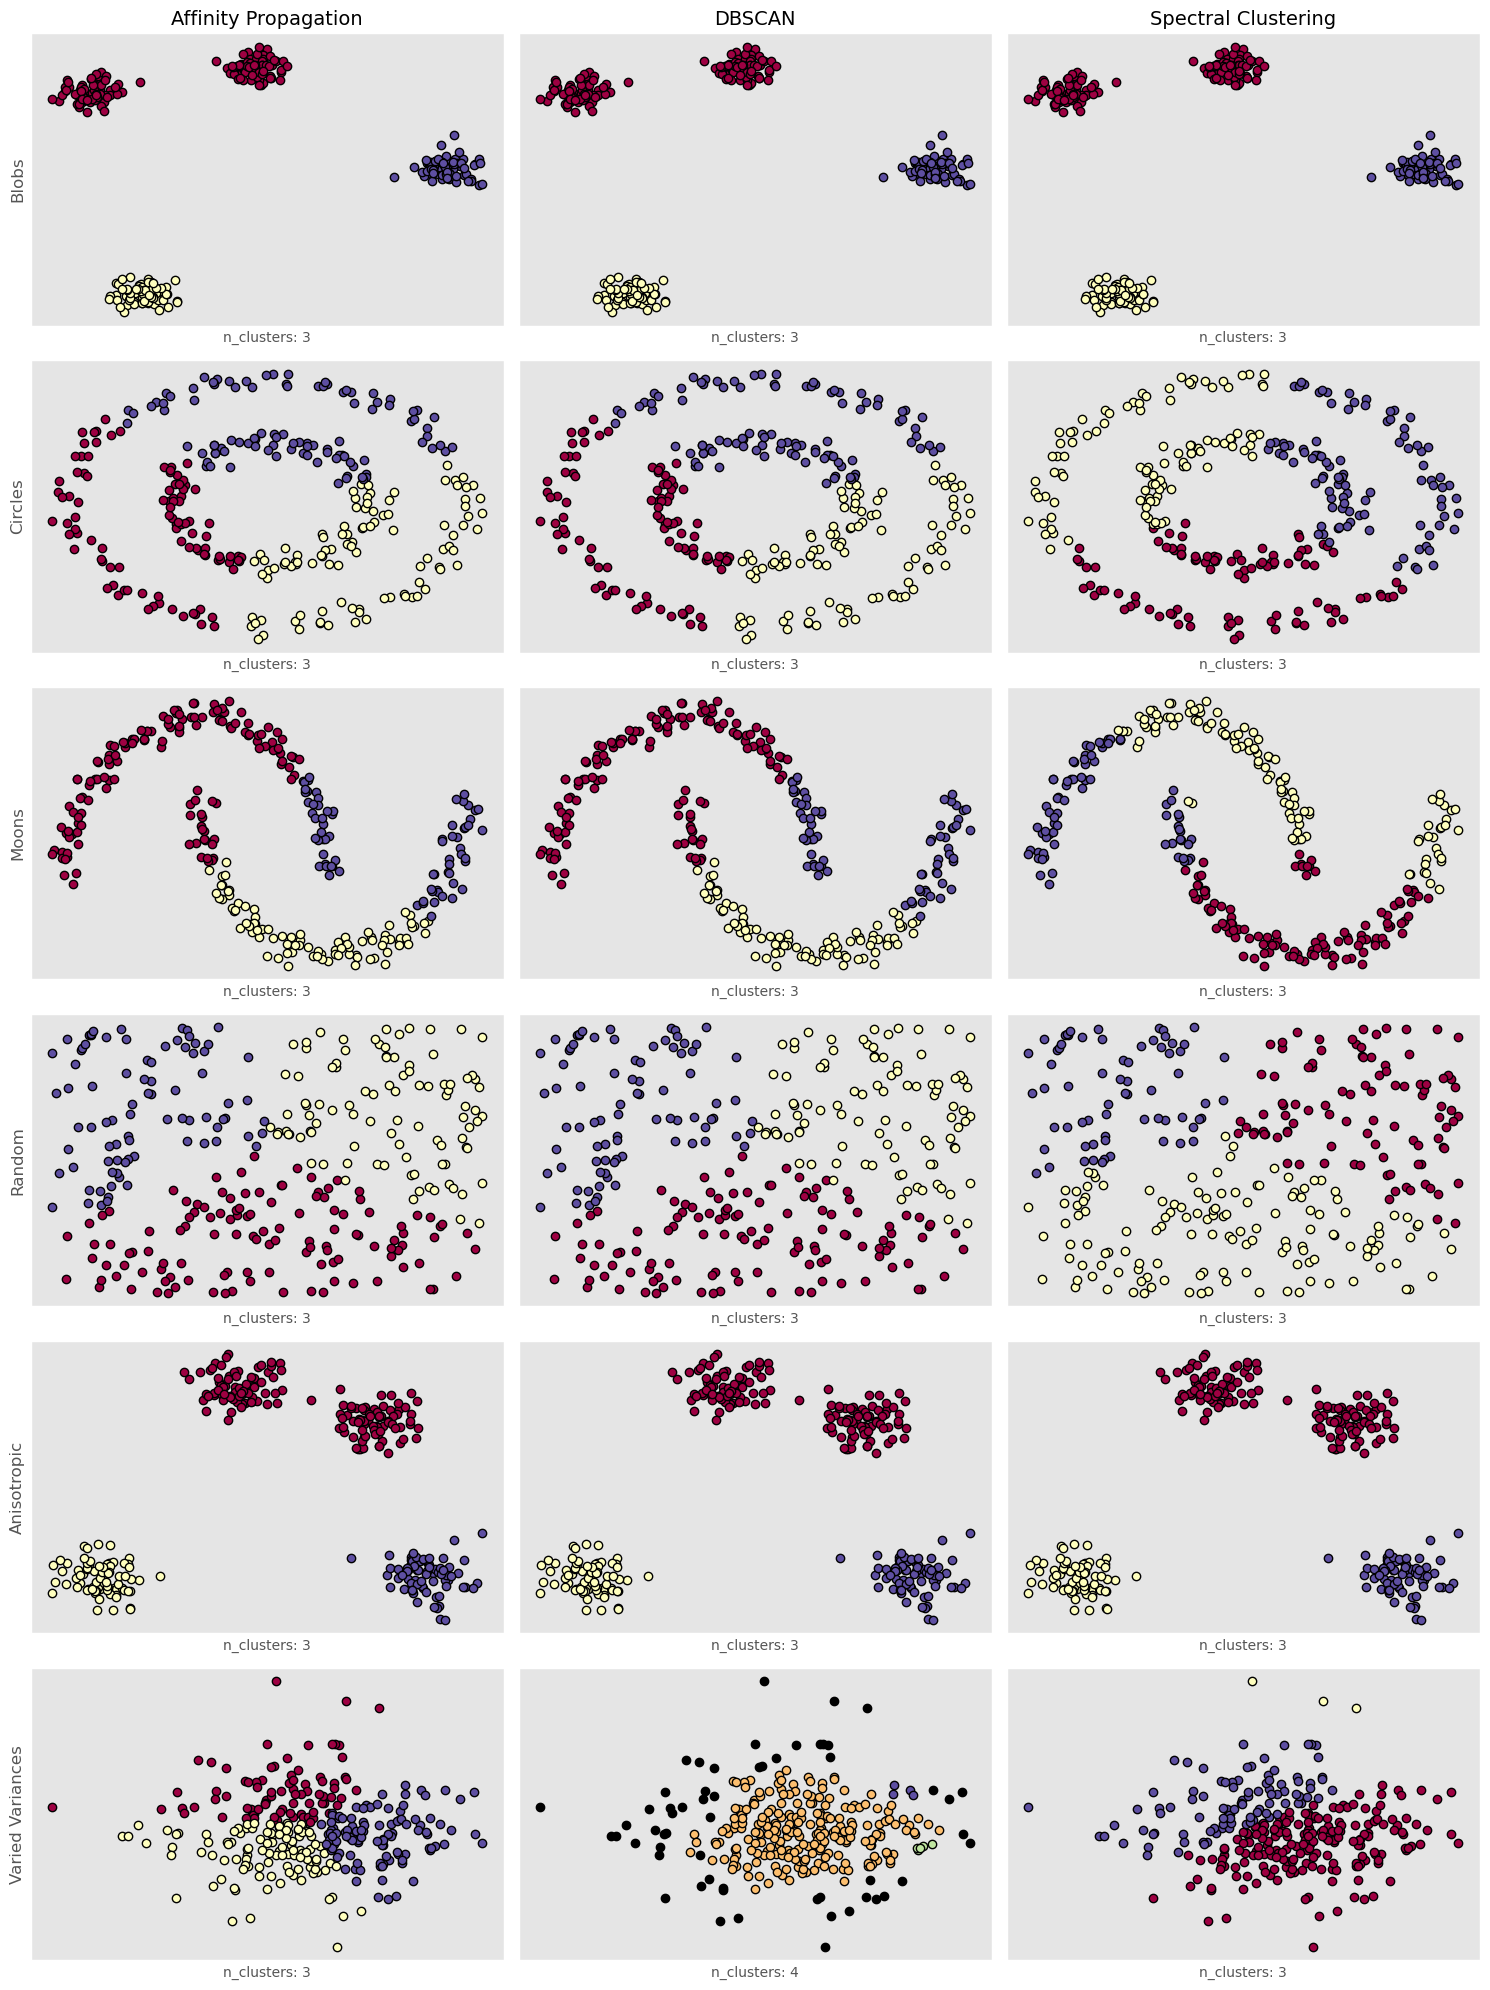

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import AffinityPropagation, DBSCAN, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

def generate_datasets():
    def blobs(n_samples=300):
        X, _ = make_blobs(n_samples=n_samples, centers=4, cluster_std=0.6, random_state=42)
        return X

    def circles(n_samples=300):
        X, _ = make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=42)
        return X

    def moons(n_samples=300):
        X, _ = make_moons(n_samples=n_samples, noise=0.05, random_state=42)
        return X

    def random_data(n_samples=300):
        return np.random.rand(n_samples, 2) * 2 - 1

    def anisotropic(n_samples=300):
        X, _ = make_blobs(n_samples=n_samples, centers=4, random_state=42)
        return np.dot(X, [[0.6, -0.6], [0.4, 0.8]])

    def varied_variances(n_samples=300):
        covs = [[[2, 0], [0, 0.5]], [[0.5, 0], [0, 2]], [[1, 0], [0, 1]]]
        return np.concatenate([np.random.multivariate_normal([0,0], cov, n_samples//3) for cov in covs])

    return {
        'Blobs': blobs,
        'Circles': circles,
        'Moons': moons,
        'Random': random_data,
        'Anisotropic': anisotropic,
        'Varied Variances': varied_variances}

def affinity_propagation(X):
    try:
        model = AffinityPropagation(damping=0.9, max_iter=200)
        labels = model.fit_predict(X)
        
        if len(np.unique(labels)) != 3:
            kmeans = KMeans(n_clusters=3, random_state=42)
            labels = kmeans.fit_predict(X)
        return labels
    except:
        return np.zeros(len(X))

def dbscan(X):
    try:
        neighbors = NearestNeighbors(n_neighbors=5)
        neighbors.fit(X)
        distances, _ = neighbors.kneighbors(X)
        eps = np.percentile(distances[:, -1], 75) 
        
        model = DBSCAN(eps=eps, min_samples=5)
        labels = model.fit_predict(X)
        
        unique_labels = np.unique(labels[labels != -1])
        if len(unique_labels) < 2 or len(unique_labels) > 3:
            kmeans = KMeans(n_clusters=3, random_state=42)
            labels = kmeans.fit_predict(X)
        return labels
    except:
        return np.zeros(len(X))

def spectral_clustering(X):
    try:
        return SpectralClustering(
            n_clusters=3, 
            affinity='rbf', 
            random_state=42
        ).fit_predict(X)
    except:
        return np.zeros(len(X))

def plot_results(data_generators, cluster_methods):
    fig, axes = plt.subplots(len(data_generators), len(cluster_methods), figsize=(15, 20))
    for i, (data_name, data_gen) in enumerate(data_generators.items()):
        X = data_gen()
        X = StandardScaler().fit_transform(X)
        axes[i, 0].set_ylabel(data_name, rotation=90, size=12)
        for j, (method_name, method) in enumerate(cluster_methods.items()):
            if i == 0:
                axes[i, j].set_title(method_name, size=14)
            labels = method(X)
            unique_labels = np.unique(labels)
            colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
            for k, col in zip(unique_labels, colors):
                if k == -1:
                    col = [0, 0, 0, 1] 
                
                class_member_mask = (labels == k)
                xy = X[class_member_mask]
                axes[i, j].plot(xy[:, 0], xy[:, 1], 'o', 
                              markerfacecolor=tuple(col), 
                              markeredgecolor='k', 
                              markersize=6)
            axes[i, j].set_xticks(())
            axes[i, j].set_yticks(())
            axes[i, j].set_xlabel(f'n_clusters: {len(unique_labels)}', size=10)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    data_generators = generate_datasets()
    cluster_methods = {
        'Affinity Propagation': affinity_propagation,
        'DBSCAN': dbscan,
        'Spectral Clustering': spectral_clustering}
    plot_results(data_generators, cluster_methods)